In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [144]:
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [ ]:
#stupid cell to prove a point that models take more work than just
#throwing all unedited information into them
#meant to crash the kernel, DON'T RUN AGAIN

#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

In [5]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print('{}: {}'.format(i, column.nunique()))

id: 421097
term: 2
int_rate: 110
grade: 7
sub_grade: 35
emp_title: 120812
emp_length: 11
home_ownership: 4
verification_status: 3
issue_d: 12
loan_status: 7
pymnt_plan: 1
url: 421095
desc: 34
purpose: 14
title: 27
zip_code: 914
addr_state: 49
earliest_cr_line: 668
revol_util: 1211
initial_list_status: 2
last_pymnt_d: 25
next_pymnt_d: 4
last_credit_pull_d: 26
application_type: 2
verification_status_joint: 3


In [145]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line',
            'revol_util', 'sub_grade', 'addr_state', 'desc'], 1,
           inplace=True
          )

In [5]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
y2015 = y2015[:-2]

In [152]:
loan_status = y2015['loan_status']

print(len(y2015.columns))
y2015.drop(['loan_status'], axis=1, inplace=True)
print(len(y2015.columns))

103
102


In [11]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
cross_val_score(rfc, X, Y, cv=10)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.98067013, 0.98069388, 0.98150127, 0.98180998, 0.9742579 ,
       0.97703633, 0.96490062, 0.98038424, 0.98019332, 0.98000285])

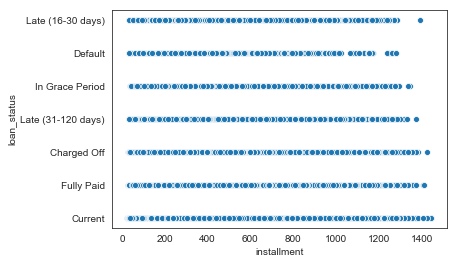

In [24]:
sns.set_style('white')

sns.scatterplot(
    y2015['installment'],
    y2015['loan_status']
)
plt.show()

In [153]:
y2015 = pd.get_dummies(y2015)
len(y2015.columns)

230

In [154]:
y2015 = pd.concat([y2015, loan_status], axis=1)

0                    Current
1                    Current
2                 Fully Paid
3                    Current
4                 Fully Paid
5                    Current
6                    Current
7                 Fully Paid
8                    Current
9                 Fully Paid
10                   Current
11                   Current
12                   Current
13                   Current
14                Fully Paid
15                   Current
16                   Current
17                   Current
18                   Current
19                   Current
20                   Current
21                Fully Paid
22                   Current
23                   Current
24                   Current
25                   Current
26                   Current
27                Fully Paid
28                   Current
29                   Current
                 ...        
421065               Current
421066               Current
421067               Current
421068        

In [67]:
correlations = y2015.corr()

In [24]:
correlations.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_wit

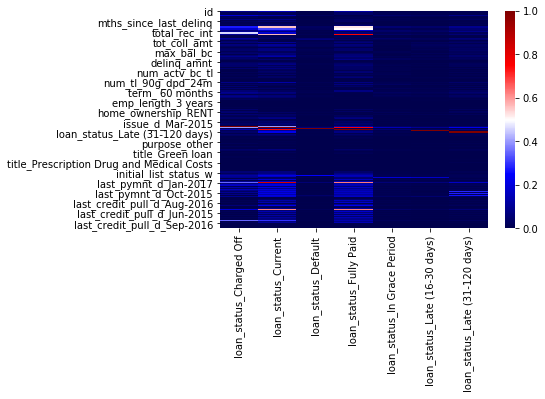

In [116]:
mask = ['loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Default', 'loan_status_Fully Paid',
       'loan_status_In Grace Period', 'loan_status_Late (16-30 days)',
       'loan_status_Late (31-120 days)']

targets = correlations.loc[:,mask].abs()

sns.heatmap(
    targets,
    cmap='seismic'
)
plt.show()

In [133]:
features = []

for i in mask:
    hold = targets.loc[targets[i] >= 0.2]
    hold.drop([i], axis=0)
    features.append(list(hold.index))

features = pd.DataFrame(features)  
features = pd.melt(features)
features.drop_duplicates('value', keep='first', inplace=True)
features = features.drop(features.index[1:5])
features = features.drop(features.index[3])
features = list(features.value)
features

['out_prncp',
 'out_prncp_inv',
 'last_pymnt_d_Aug-2016',
 'loan_status_Late (31-120 days)',
 'total_rec_prncp',
 'total_pymnt',
 'last_pymnt_d_Nov-2016',
 'recoveries',
 'total_pymnt_inv',
 'last_pymnt_d_Oct-2016',
 'collection_recovery_fee',
 'last_pymnt_d_Sep-2016',
 'loan_status_Charged Off',
 'last_pymnt_amnt',
 'last_pymnt_d_Jan-2017',
 'loan_status_Fully Paid',
 'next_pymnt_d_Feb-2017',
 'last_credit_pull_d_Oct-2016',
 'last_credit_pull_d_Dec-2016',
 'last_credit_pull_d_Jan-2017',
 'last_pymnt_d_Jul-2016',
 'last_pymnt_d_Jun-2016',
 'last_pymnt_d_Mar-2016']

In [160]:
rfc = ensemble.RandomForestClassifier()
X = y2015.loc[:, ['out_prncp',
 'out_prncp_inv',
 'last_pymnt_d_Aug-2016',
 'loan_status_Late (31-120 days)',
 'total_rec_prncp',
 'total_pymnt',
 'last_pymnt_d_Nov-2016',
 'recoveries',
 'total_pymnt_inv',
 'last_pymnt_d_Oct-2016',
 'collection_recovery_fee',
 'last_pymnt_d_Sep-2016',
 'loan_status_Charged Off',
 'last_pymnt_amnt',
 'last_pymnt_d_Jan-2017',
 'loan_status_Fully Paid',
 'next_pymnt_d_Feb-2017',
 'last_credit_pull_d_Oct-2016',
 'last_credit_pull_d_Dec-2016',
 'last_credit_pull_d_Jan-2017',
 'last_pymnt_d_Jul-2016',
 'last_pymnt_d_Jun-2016',
 'last_pymnt_d_Mar-2016']]
Y = y2015['loan_status']
#X = pd.get_dummies(X)
X = X.dropna(axis=1)
cross_val_score(rfc, X, Y, cv=10)

array([0.96575717, 0.97245375, 0.97713187, 0.98026644, 0.96870102,
       0.97497032, 0.97245244, 0.97765323, 0.97183366, 0.97964661])